# Unleashing Pandas

## Importing a `csv` file

Let's play with the global land temperature dataset containing country-specific data from 1743 to 2013 downloaded from [https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalLandTemperaturesByCountry.csv](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalLandTemperaturesByCountry.csv). You can find a copy of the `csv` file in the `datasets` folder [https://github.com/raghurama123/DataScience/tree/main/datasets](https://github.com/raghurama123/DataScience/tree/main/datasets). 

In [1]:
import pandas as pd
temp=pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv')
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


## Remove missing entries

There are over half-a-million records, but some entries are missing denoted by `NaN`. Let's filter these and look at the remaining entries.

In [2]:
temp.isna().sum() # Total number of entries to be dropped.

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [3]:
temp=temp.dropna().reset_index(drop=True) # drop NaN entries and reassign row-indices
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
544806,2013-04-01,21.142,0.495,Zimbabwe
544807,2013-05-01,19.059,1.022,Zimbabwe
544808,2013-06-01,17.613,0.473,Zimbabwe
544809,2013-07-01,17.000,0.453,Zimbabwe


## Quick inspection and pruning of the dataset

In [4]:
temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,544811.000000
mean,17.193354,1.019190
std,10.953966,1.202634
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.207000
max,38.842000,15.003000


It looks like some entries have large uncertainties. Let's remove them.

In [5]:
temp=temp[temp['AverageTemperatureUncertainty'] <= 0.5]  # Retain data with uncertainty < 1 degree Celsius
temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,244147.000000,244147.000000
mean,18.855830,0.310470
std,9.566641,0.098011
min,-33.492000,0.052000
25%,12.875000,0.234000
50%,22.606000,0.306000
75%,26.247000,0.388000
max,38.842000,0.500000


In [6]:
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1126,1843-09-01,11.452,0.472,Åland
1128,1843-11-01,2.604,0.467,Åland
1326,1860-05-01,5.380,0.466,Åland
1384,1865-03-01,-4.983,0.412,Åland
1390,1865-09-01,12.020,0.459,Åland
...,...,...,...,...
544795,2012-05-01,19.712,0.312,Zimbabwe
544796,2012-06-01,16.631,0.277,Zimbabwe
544806,2013-04-01,21.142,0.495,Zimbabwe
544808,2013-06-01,17.613,0.473,Zimbabwe


Looks like the row-indices are not reset. So, let's reset them.

In [7]:
temp=temp.reset_index(drop=True)
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1843-09-01,11.452,0.472,Åland
1,1843-11-01,2.604,0.467,Åland
2,1860-05-01,5.380,0.466,Åland
3,1865-03-01,-4.983,0.412,Åland
4,1865-09-01,12.020,0.459,Åland
...,...,...,...,...
244142,2012-05-01,19.712,0.312,Zimbabwe
244143,2012-06-01,16.631,0.277,Zimbabwe
244144,2013-04-01,21.142,0.495,Zimbabwe
244145,2013-06-01,17.613,0.473,Zimbabwe


In [8]:
temp.head()  # first few entries

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1843-09-01,11.452,0.472,Åland
1,1843-11-01,2.604,0.467,Åland
2,1860-05-01,5.380,0.466,Åland
3,1865-03-01,-4.983,0.412,Åland
4,1865-09-01,12.020,0.459,Åland


In [9]:
temp.tail() # last few entries

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
244142,2012-05-01,19.712,0.312,Zimbabwe
244143,2012-06-01,16.631,0.277,Zimbabwe
244144,2013-04-01,21.142,0.495,Zimbabwe
244145,2013-06-01,17.613,0.473,Zimbabwe
244146,2013-07-01,17.000,0.453,Zimbabwe


## Now we can do some meaningful analysis

In [10]:
minval=temp['AverageTemperature'].min()
coolest=temp[temp['AverageTemperature'] ==minval] 
print(coolest)

               dt  AverageTemperature  AverageTemperatureUncertainty  \
89912  1992-02-01             -33.492                          0.472   

         Country  
89912  Greenland  


<AxesSubplot:ylabel='Frequency'>

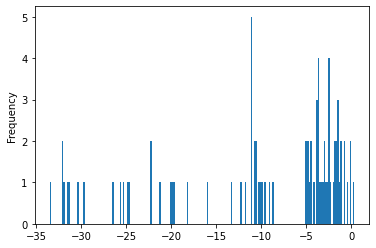

In [11]:
tempGreenland=temp[temp["Country"] == "Greenland"]
tempGreenland['AverageTemperature'].plot.hist(bins=200, alpha=1.0)

In [12]:
maxval=temp['AverageTemperature'].max()
hottest=temp[temp['AverageTemperature'] ==maxval] 
print(hottest)

                dt  AverageTemperature  AverageTemperatureUncertainty Country
121760  2012-07-01              38.842                          0.464  Kuwait


<AxesSubplot:ylabel='Frequency'>

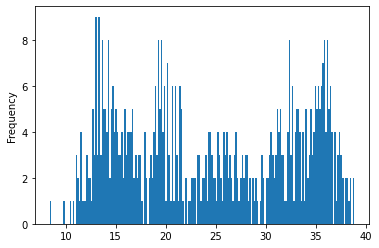

In [13]:
tempKuwait=temp[temp["Country"] == "Kuwait"]
tempKuwait['AverageTemperature'].plot.hist(bins=200, alpha=1.0)